In [11]:
import ND_north_star.src.noise_generators.perlin_noise_generator as PNG
from ND_north_star.src.utils.sampling_function import random_sampler
import ND_north_star.src.compute_errors.dataset_error as DE

from ND_north_star.src.data_fillers.kNN_filler import kNN_data_filler

import ND_north_star.src.edge_detection.complex as ED_com
from ND_north_star.src.edge_detection.contour_points_2D import find_boundary_points, group_distinct_boundary_curves, generate_spline_curve, generate_boundary_splines
import ND_north_star.src.edge_detection.gradient_detection as ED_sim

from ND_north_star.src.utils.sampling_function import random_sampler, dual_sampler

# Distances and definitions
## Discrete Chamfer Distance

Given two point sets the discrete Chamfer distance C(A,B) is defined as the average of the minimum distances from each point in set A to the nearest point in set B and vice versa.
$$C(A,B)= \dfrac{1}{|A|}\sum_{a\in A}min_{a\in A}d(a,B)+\dfrac{1}{|B|}\sum_{a\in B}min_{b\in B}d(A,b) $$

In [12]:
import numpy as np
from scipy.spatial import distance

def chamfer_distance(set1, set2):
    dist_matrix = distance.cdist(set1, set2, 'euclidean')
    dist1 = np.mean(np.min(dist_matrix, axis=1))
    dist2 = np.mean(np.min(dist_matrix, axis=0))
    return dist1 + dist2

## Discrete Hausdorff Distance
$$ H(A,B)= max\{min_{a \in A}d(a,B),min_{b\in B}d(b,A)\}$$

Discrete Frechet distance is equivalent to Hausdorff

In [13]:
def hausdorff_distance(set1, set2):
    dist_matrix = distance.cdist(set1, set2, 'euclidean')
    dist1 = np.min(dist_matrix, axis=1)
    dist2 = np.min(dist_matrix, axis=0)
    result = np.max([dist1,dist2])
    return result

In [14]:
resolution = 80
dimensions = [resolution, resolution]

full_dataset = PNG.normalized_perlin_data(dimensions, 2)

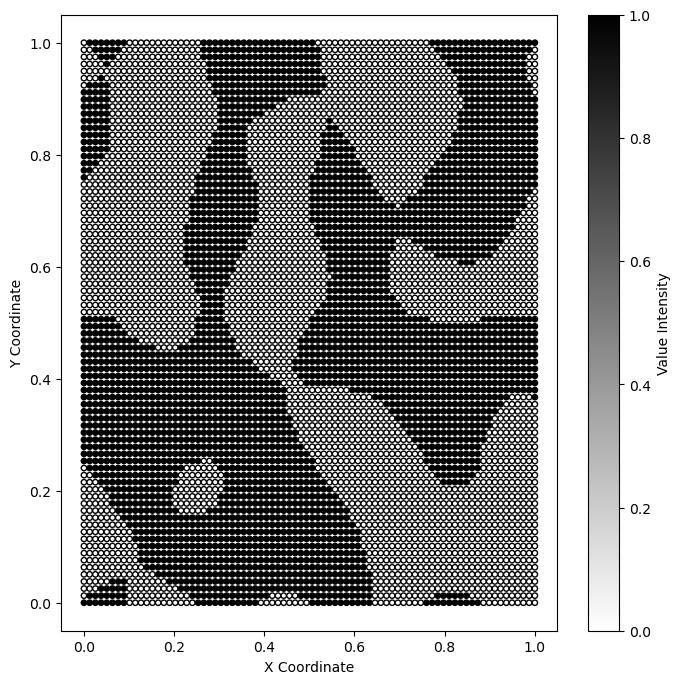

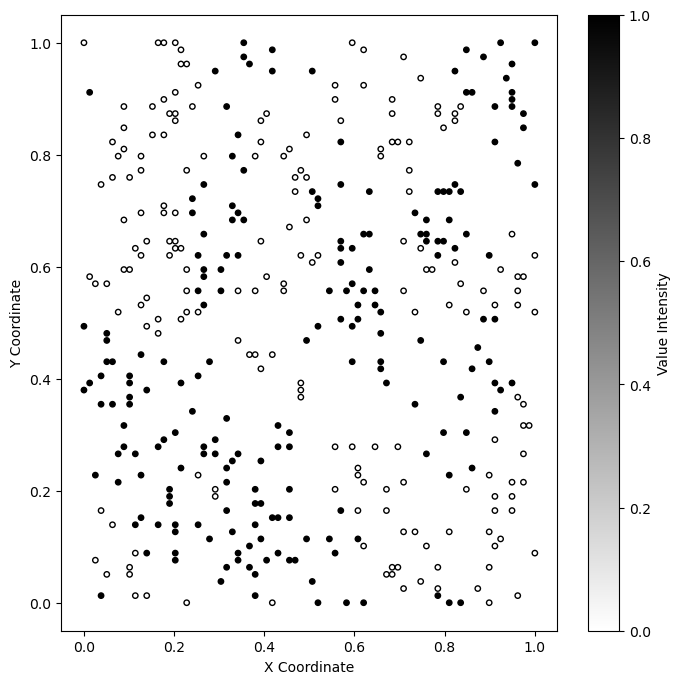

In [15]:

resolution = 80
dimensions = [resolution, resolution]

dataset = PNG.normalized_perlin_data(dimensions, 4)
PNG.plot_perlin_2D_3D(dataset, 'black')

num_samples = (resolution**2)//16
sampled_dataset = random_sampler(dataset, num_samples)
PNG.plot_perlin_2D_3D(sampled_dataset, 'black')

In [16]:
import numpy as np

computed_dataset = kNN_data_filler(sampled_dataset,k=2, rounding_threshold=0.9)

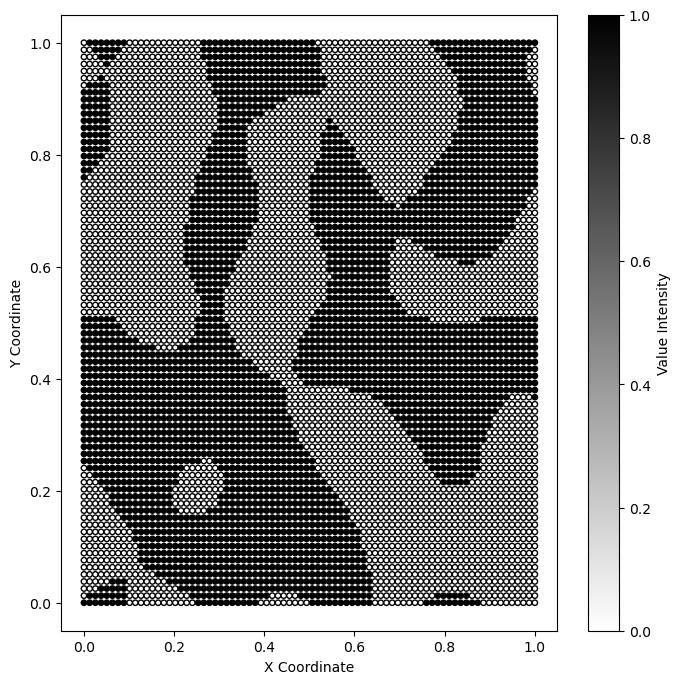

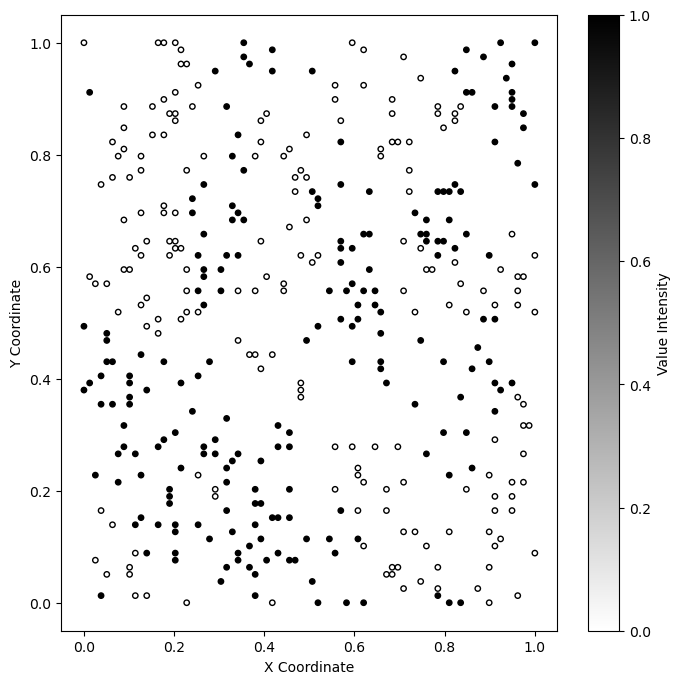

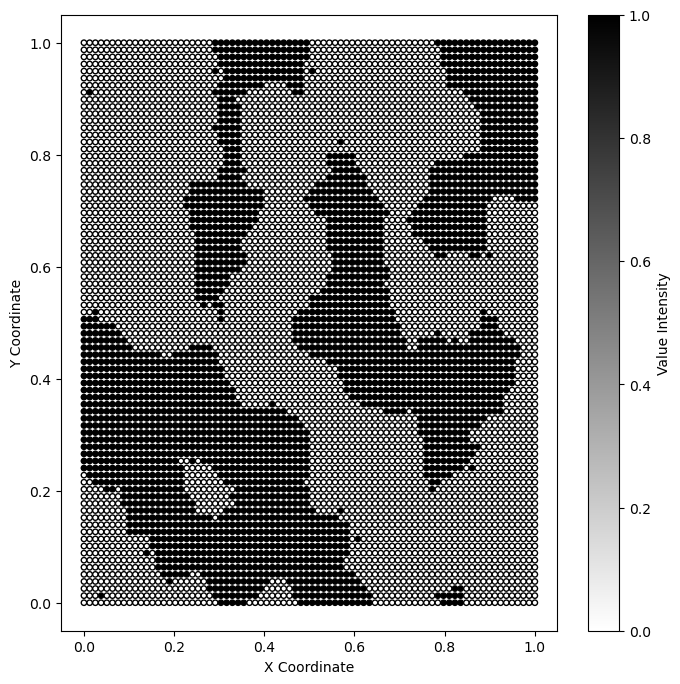

In [17]:
PNG.plot_perlin_2D_3D(dataset, 'black')
PNG.plot_perlin_2D_3D(sampled_dataset, 'black')
PNG.plot_perlin_2D_3D(computed_dataset, 'black')

In [18]:
boundary_original = find_boundary_points(full_dataset)
boundary_pred = find_boundary_points(computed_dataset)
print(len(boundary_pred),len(boundary_original))

884 410


In [23]:
boundary_original = find_boundary_points(full_dataset)
dist_org_pred = []

for i in range(1,7):

    computed_dataset = kNN_data_filler(sampled_dataset,k=i, rounding_threshold=0.9)
    boundary_pred = find_boundary_points(computed_dataset)

    dist_org_pred.append(chamfer_distance(boundary_original,boundary_pred))
   

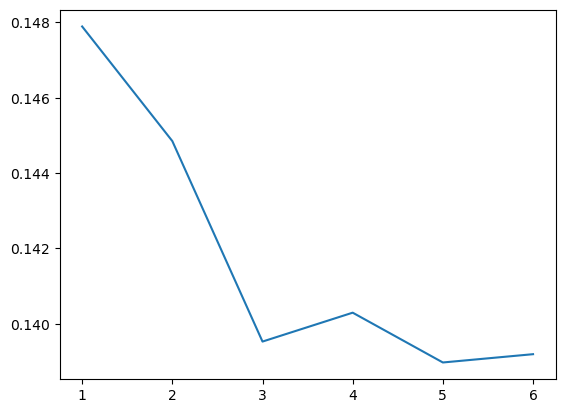

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(1, 7), dist_org_pred)
plt.show()
